In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.





/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import pandas as pd
train_housing = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv') 
test_housing = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
null_fields=[]
null_test=[]
for column in train_housing.columns:
    if train_housing[column].isnull().any():
        null_fields.append(column)
for column in test_housing.columns:
    if test_housing[column].isnull().any():
        null_test.append(column)

In [3]:
print(len(null_test))

33


In [4]:
import numpy as np
for column in null_fields:
    if(train_housing[column].dtype=='float64'):
        train_housing[column]=np.nanmean(train_housing[column])
for column in null_test:
    #print(train_housing[column].dtype)
    if(test_housing[column].dtype=='float64'):
        test_housing[column]=np.nanmean(test_housing[column])
    if(test_housing[column].dtype=='int64'):
        test_housing[column]=np.nanmean(test_housing[column])

In [5]:
null_replace=[]
replace_test=[]
for column in train_housing.columns:
    if train_housing[column].isnull().any():
        null_replace.append(column)
for column in test_housing.columns:
    if test_housing[column].isnull().any():
        replace_test.append(column)
print(len(replace_test))

22


In [6]:
train_housing['Electrical'] = train_housing['Electrical'].fillna(train_housing['Electrical'].mode())

In [7]:
nan_values = []
for col in train_housing.columns:
    if len(np.unique(train_housing[col].isnull()))>1:
        nan_values.append(col)

In [8]:
for nan_value in nan_values:
    train_housing[nan_value] = train_housing[nan_value].fillna('None')

In [9]:
nan_values

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

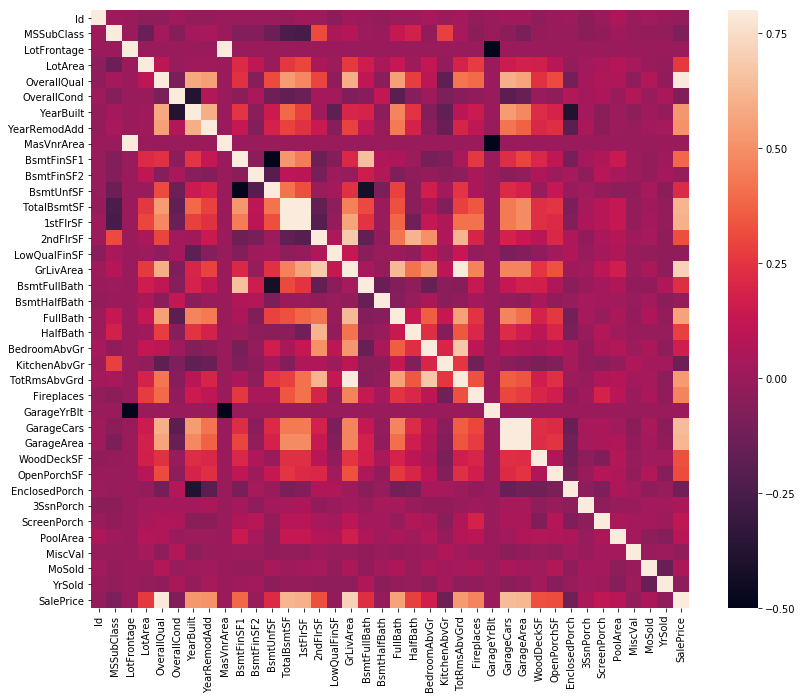

In [10]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train_housing.corr(method='pearson')
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat,vmin=-0.5, vmax=0.8, square=True);


In [11]:
corrmat['SalePrice']

Id              -2.191672e-02
MSSubClass      -8.428414e-02
LotFrontage      2.740391e-16
LotArea          2.638434e-01
OverallQual      7.909816e-01
OverallCond     -7.785589e-02
YearBuilt        5.228973e-01
YearRemodAdd     5.071010e-01
MasVnrArea       1.082255e-16
BsmtFinSF1       3.864198e-01
BsmtFinSF2      -1.137812e-02
BsmtUnfSF        2.144791e-01
TotalBsmtSF      6.135806e-01
1stFlrSF         6.058522e-01
2ndFlrSF         3.193338e-01
LowQualFinSF    -2.560613e-02
GrLivArea        7.086245e-01
BsmtFullBath     2.271222e-01
BsmtHalfBath    -1.684415e-02
FullBath         5.606638e-01
HalfBath         2.841077e-01
BedroomAbvGr     1.682132e-01
KitchenAbvGr    -1.359074e-01
TotRmsAbvGrd     5.337232e-01
Fireplaces       4.669288e-01
GarageYrBlt      1.750050e-16
GarageCars       6.404092e-01
GarageArea       6.234314e-01
WoodDeckSF       3.244134e-01
OpenPorchSF      3.158562e-01
EnclosedPorch   -1.285780e-01
3SsnPorch        4.458367e-02
ScreenPorch      1.114466e-01
PoolArea  

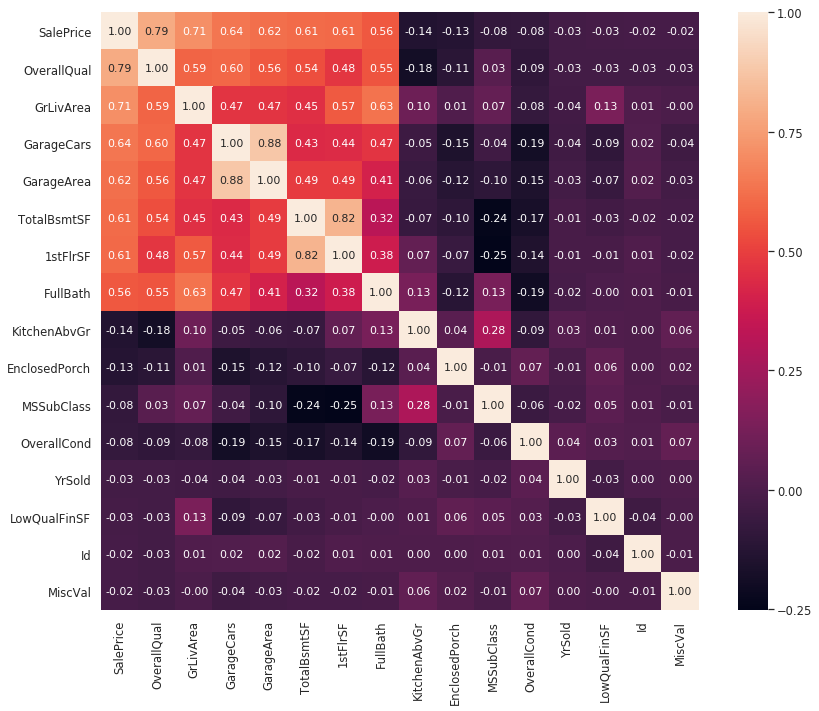

In [12]:
#saleprice correlation matrix
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
sm_value = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
sm_la_col = list(cols)+list(sm_value)
cm = np.corrcoef(train_housing[sm_la_col].values.T)
sns.set(font_scale=1.05)
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=sm_la_col, xticklabels=sm_la_col)
plt.show()

In [13]:
cols.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath'], dtype=object)

In [14]:
cm

array([[ 1.00000000e+00,  7.90981601e-01,  7.08624478e-01,
         6.40409197e-01,  6.23431439e-01,  6.13580552e-01,
         6.05852185e-01,  5.60663763e-01, -1.35907371e-01,
        -1.28577958e-01, -8.42841351e-02, -7.78558940e-02,
        -2.89225852e-02, -2.56061300e-02, -2.19167194e-02,
        -2.11895796e-02],
       [ 7.90981601e-01,  1.00000000e+00,  5.93007430e-01,
         6.00670717e-01,  5.62021757e-01,  5.37808499e-01,
         4.76223829e-01,  5.50599709e-01, -1.83882235e-01,
        -1.13936859e-01,  3.26277075e-02, -9.19323426e-02,
        -2.73467083e-02, -3.04292840e-02, -2.83647539e-02,
        -3.14062105e-02],
       [ 7.08624478e-01,  5.93007430e-01,  1.00000000e+00,
         4.67247419e-01,  4.68997477e-01,  4.54868203e-01,
         5.66023969e-01,  6.30011646e-01,  1.00063165e-01,
         9.11321033e-03,  7.48531797e-02, -7.96858654e-02,
        -3.65258196e-02,  1.34682813e-01,  8.27275766e-03,
        -2.41563955e-03],
       [ 6.40409197e-01,  6.00670717e

In [15]:
np.unique(train_housing['LotFrontage'])

array([70.04995837])

In [16]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corrmat.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

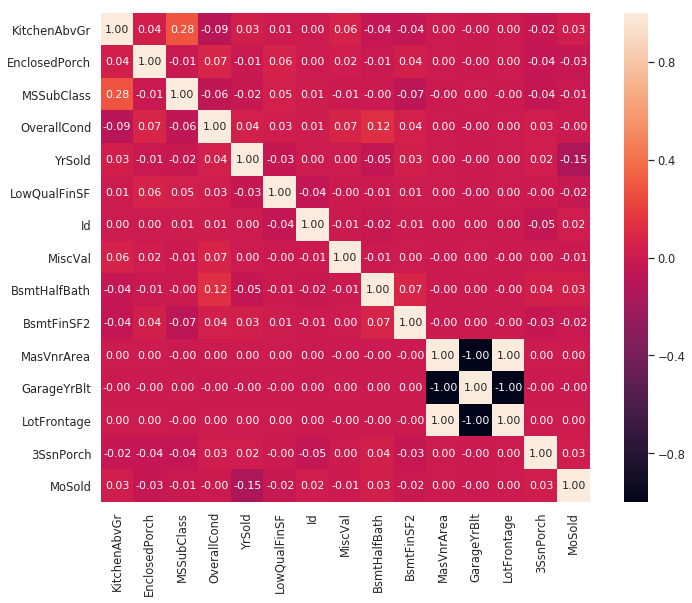

In [17]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_housing[cols].values.T)
sns.set(font_scale=1.05)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
train_housing.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

In [19]:
corrmat['SalePrice'].sort_values()

KitchenAbvGr    -1.359074e-01
EnclosedPorch   -1.285780e-01
MSSubClass      -8.428414e-02
OverallCond     -7.785589e-02
YrSold          -2.892259e-02
LowQualFinSF    -2.560613e-02
Id              -2.191672e-02
MiscVal         -2.118958e-02
BsmtHalfBath    -1.684415e-02
BsmtFinSF2      -1.137812e-02
MasVnrArea       1.082255e-16
GarageYrBlt      1.750050e-16
LotFrontage      2.740391e-16
3SsnPorch        4.458367e-02
MoSold           4.643225e-02
PoolArea         9.240355e-02
ScreenPorch      1.114466e-01
BedroomAbvGr     1.682132e-01
BsmtUnfSF        2.144791e-01
BsmtFullBath     2.271222e-01
LotArea          2.638434e-01
HalfBath         2.841077e-01
OpenPorchSF      3.158562e-01
2ndFlrSF         3.193338e-01
WoodDeckSF       3.244134e-01
BsmtFinSF1       3.864198e-01
Fireplaces       4.669288e-01
YearRemodAdd     5.071010e-01
YearBuilt        5.228973e-01
TotRmsAbvGrd     5.337232e-01
FullBath         5.606638e-01
1stFlrSF         6.058522e-01
TotalBsmtSF      6.135806e-01
GarageArea